# Exploratory Data Analysis (EDA) and its steps.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../Datasets/EDA/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 1. Null Value Removal

In [2]:
df.shape

(11914, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
df.isna().sum() / df.shape[0] * 100

Make                  0.000000
Model                 0.000000
Year                  0.000000
Engine Fuel Type      0.025180
Engine HP             0.579151
Engine Cylinders      0.251805
Transmission Type     0.000000
Driven_Wheels         0.000000
Number of Doors       0.050361
Market Category      31.408427
Vehicle Size          0.000000
Vehicle Style         0.000000
highway MPG           0.000000
city mpg              0.000000
Popularity            0.000000
MSRP                  0.000000
dtype: float64

In [5]:
df['Market Category'].mode()

0    Crossover
Name: Market Category, dtype: object

In [6]:
df['Market Category'].value_counts().head()

Market Category
Crossover             1110
Flex Fuel              872
Luxury                 855
Luxury,Performance     673
Hatchback              641
Name: count, dtype: int64

In [7]:
df['Market Category'].loc[df[df['Market Category'].isna()].index] = 'Crossover'

C:\Users\HP\AppData\Local\Temp\ipykernel_33096\3680913628.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Market Category'].loc[df[df['Market Category'].isna()].index] = 'Crossover'
C:\Users\HP\AppData\Local\Temp\ipykernel_33096\3680

In [8]:
np.round(df['Engine Cylinders'].mean())

np.float64(6.0)

In [9]:
df['Engine Cylinders'].loc[df[df['Engine Cylinders'].isna()].index] = np.round(df['Engine Cylinders'].mean())

C:\Users\HP\AppData\Local\Temp\ipykernel_33096\903604844.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Engine Cylinders'].loc[df[df['Engine Cylinders'].isna()].index] = np.round(df['Engine Cylinders'].mean())
C:\Users\HP\AppData\Lo

In [10]:
df['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12.,  0., 10.,  3., 16.])

In [11]:
df.isna().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders      0
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Market Category       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [12]:
def remove_na(columns: list):
    total = 0
    for column in columns:
        if column in df.columns:
            drop_count = df[df[column].isna()].shape[0]
            df.drop(df[df[column].isna()].index, inplace = True)
            print(f'removed {drop_count} entries for {column}.')
            total += drop_count
        else:
            print(f'{column} is not present in DataFrame.')

In [13]:
# df.drop(df[df['Engine HP'].isna()].index, inplace = True)
remove_na(['Engine HP', 'Engine Fuel Type', 'Number of Doors', 'YOYOY'])

removed 69 entries for Engine HP.
removed 3 entries for Engine Fuel Type.
removed 1 entries for Number of Doors.
YOYOY is not present in DataFrame.


In [14]:
df.reset_index(drop = True, inplace = True)
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11836,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11837,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11838,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11839,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11840,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11841 entries, 0 to 11840
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11841 non-null  object 
 1   Model              11841 non-null  object 
 2   Year               11841 non-null  int64  
 3   Engine Fuel Type   11841 non-null  object 
 4   Engine HP          11841 non-null  float64
 5   Engine Cylinders   11841 non-null  float64
 6   Transmission Type  11841 non-null  object 
 7   Driven_Wheels      11841 non-null  object 
 8   Number of Doors    11841 non-null  float64
 9   Market Category    11841 non-null  object 
 10  Vehicle Size       11841 non-null  object 
 11  Vehicle Style      11841 non-null  object 
 12  highway MPG        11841 non-null  int64  
 13  city mpg           11841 non-null  int64  
 14  Popularity         11841 non-null  int64  
 15  MSRP               11841 non-null  int64  
dtypes: float64(3), int64(5

In [16]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 2. Drop Duplicate Rows

In [17]:
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11121,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11122,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11123,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11124,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11125,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## 3. Outlier Handling

### Box Plot Method

In [18]:
# checking quartile values.

print(f'Q25: {df['Engine HP'].quantile(0.25)}')
print(f'Q50: {df['Engine HP'].quantile(0.50)}')
print(f'Q75: {df['Engine HP'].quantile(0.75)}')

Q25: 172.0
Q50: 239.0
Q75: 303.0


In [19]:
# Box Plot Method requires the following:
# 1. IQR(InterQuartile Range): Q3 - Q1
# 2. Lower Bound: Q1 - IQR * 1.5
# 2. Upper Bound: Q3 + IQR * 1.5

# for df['Engine HP']
q1 = df['Engine HP'].quantile(0.25)
q3 = df['Engine HP'].quantile(0.75)

iqr = q3 - q1
lower_outliers = q1 - iqr * 1.5
upper_outliers = q3 + iqr * 1.5

iqr, lower_outliers, upper_outliers

(np.float64(131.0), np.float64(-24.5), np.float64(499.5))

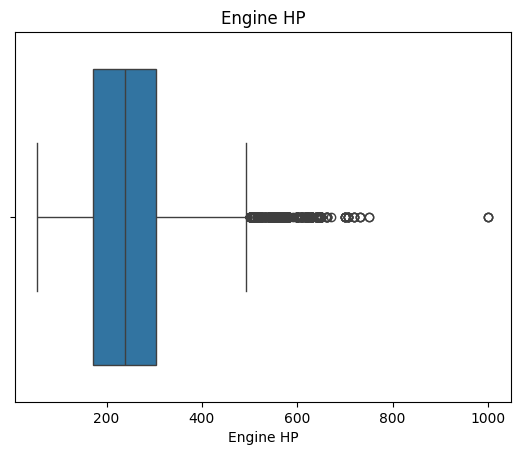

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.boxplot(df, x = 'Engine HP')
plt.title('Engine HP')
plt.show()

In [21]:
df[df['Engine HP'] > 499.5].shape

(501, 16)

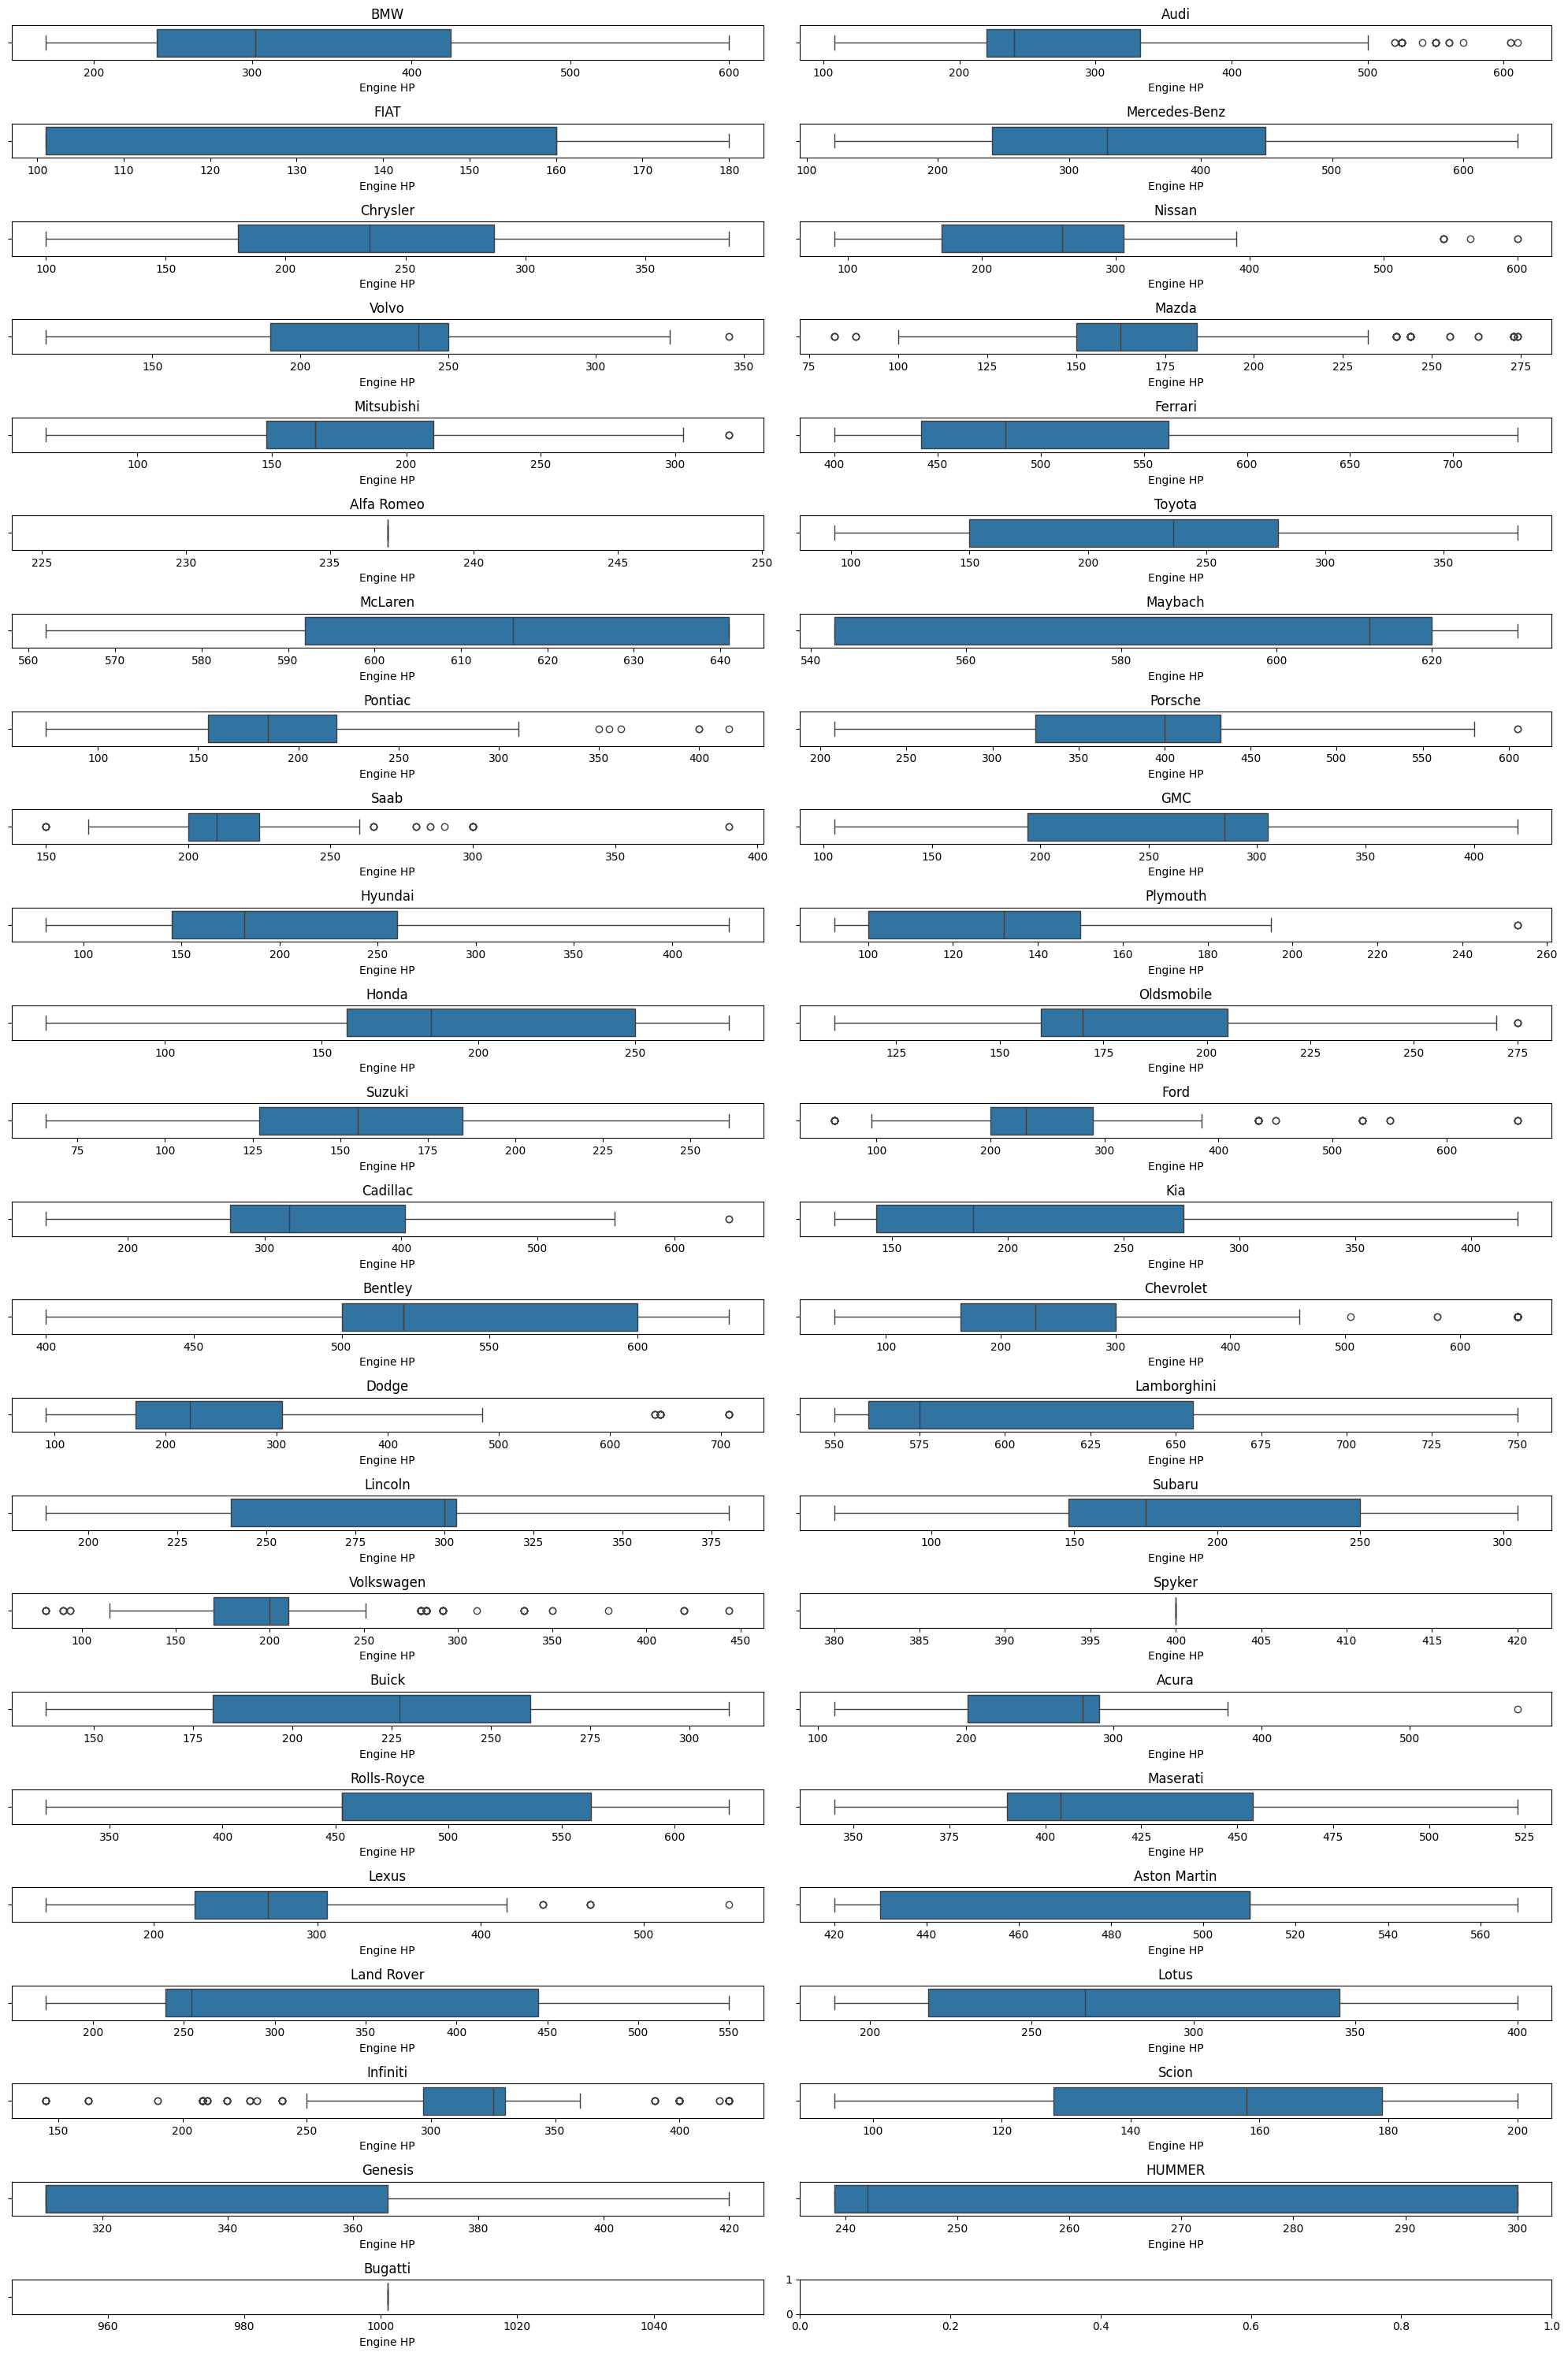

In [22]:
fig, ax = plt.subplots(24,2,figsize=(20,30))
make = iter(df.Make.unique())
for row in range(24):
    for col in range(2):   # 0 1
      try:
        m = next(make)
      except:
        break
      # sns.set_theme(rc={'figure.figsize':(11.7, 8.27)})
      sns.boxplot(df[df['Make']==m],x="Engine HP",ax=ax[row,col])
      ax[row,col].set_title(m)
plt.tight_layout()
plt.show()

### Z-score Method

In [23]:
# Z-score normalization, also known as standardization, is a data preprocessing technique that rescales data points so that
# the dataset has a mean of 0 and a standard deviation of 1.

# # z-score formula: (x - mean) / standard variation.

# z-score is also known as Standard Scaler.

# if the z-score is not between the range -3 to +3 than that corresponding value is an outlier. 

In [24]:
scores = {
    'math': [55, 87, 48, 65],
    'science': [48, 87, 75, 95]
}

scores_df = pd.DataFrame(scores)

In [25]:
# getting z-score using sklearn (Standard Scaler)
from sklearn.preprocessing import StandardScaler
sk = StandardScaler()

sk_zscore = sk.fit_transform(scores_df)

print(sk_zscore)
print(sk.inverse_transform(sk_zscore))

[[-0.59441687 -1.58746073]
 [ 1.57945053  0.60407798]
 [-1.06995036 -0.07024163]
 [ 0.0849167   1.05362438]]
[[55. 48.]
 [87. 87.]
 [48. 75.]
 [65. 95.]]


In [26]:
# getting z score using a custom python function
def my_zscore(x: list):
    import pandas as pd
    x = pd.Series(x)
    mean = x.mean()
    std = x.std(ddof = 0)
    
    return (x - mean) / std

my_zscore(list(scores_df['math']))

0   -0.594417
1    1.579451
2   -1.069950
3    0.084917
dtype: float64

In [27]:
engine_hp = list(df['Engine HP'])
df[(pd.Series(my_zscore(engine_hp)) > 3 | (my_zscore(engine_hp) < -3))].head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
281,Ferrari,360,2002,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,15,10,2774,160829
282,Ferrari,360,2002,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,10,2774,140615
283,Ferrari,360,2002,premium unleaded (required),400.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,10,2774,150694
284,Ferrari,360,2002,premium unleaded (required),400.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,15,10,2774,170829
285,Ferrari,360,2003,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,15,10,2774,165986


In [28]:
# getting z-score using scipy.stats

from scipy.stats import zscore

print(zscore(scores_df))

[[-0.59441687 -1.58746073]
 [ 1.57945053  0.60407798]
 [-1.06995036 -0.07024163]
 [ 0.0849167   1.05362438]]


In [ ]:
temp = pd.DataFrame(df.select_dtypes('int64').drop(['Year', 'MSRP'], axis = 1))
scaled = pd.DataFrame(sk.fit_transform(temp))

scaled.columns = df.select_dtypes('int64').drop(['Year', 'MSRP'], axis = 1).columns

scaled.head()
outliers = scaled.query("""`highway MPG` > 3 or `highway MPG` < -3 or `city mpg` > 3 or `city mpg` < -3 or `Popularity` > 3 or `Popularity` < -3""")

df.drop(index = outliers.index, inplace = True)
print()

In [54]:
df.reset_index(drop = True, inplace = True)

## 4. Encoding

In [30]:
pd.get_dummies(df['Make']).head()

,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Porsche,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Toyota,Volkswagen,Volvo
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

print(le.fit_transform(df['Make']))
print(le.inverse_transform([14]))

[ 4  4  4 ...  0  0 25]
['Ford']


## 5. Skewness

In [32]:
df.skew

<bound method DataFrame.skew of           Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11121    Acura         ZDX  2012     premium unleaded (required)      300.0   
11122    Acura         ZDX  2012     premium unleaded (required)      300.0   
11123    Acura         ZDX  2012     premium unleaded (required)      300.0   
11124    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11125  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylin

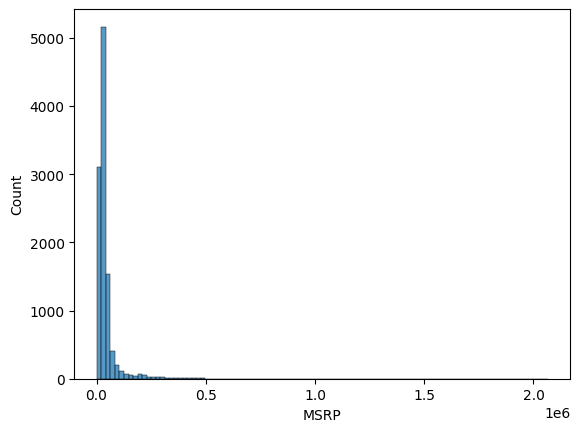

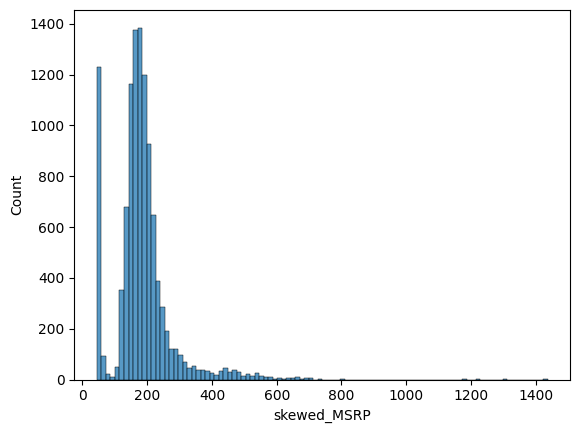

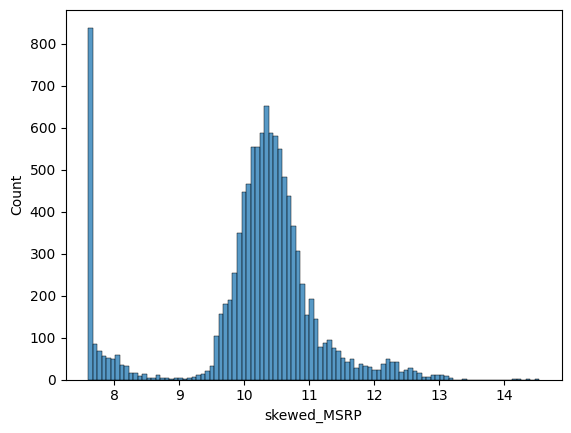

In [33]:
from seaborn import histplot
from matplotlib import pyplot as plt
import numpy as np

# default histogram.
histplot(df, x = 'MSRP', bins = 100)
plt.show()

# square root transformation to reduce skewness.
skewed_df = pd.DataFrame()
skewed_df['skewed_MSRP'] = np.sqrt(df['MSRP'])

histplot(skewed_df, x = 'skewed_MSRP', bins = 100)
plt.show()

# log transformation to reduce skewness.
skewed_df['skewed_MSRP'] = np.log1p(df['MSRP'])

histplot(skewed_df, x = 'skewed_MSRP', bins = 100)
plt.show()

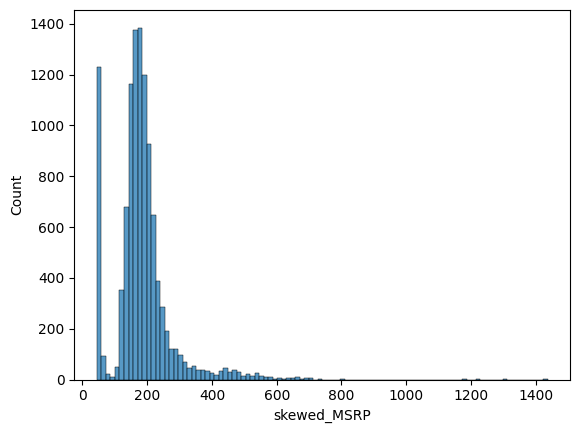

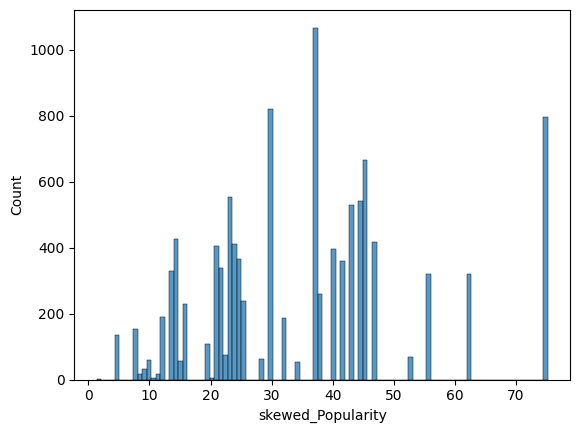

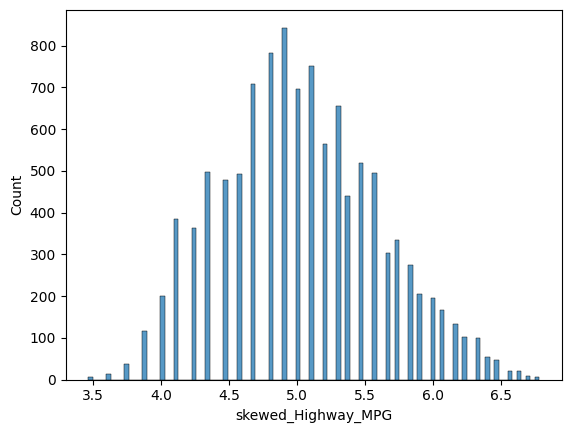

In [34]:
from seaborn import histplot
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# sqrt skewness of MSRP
skewed_df = pd.DataFrame()
skewed_df['skewed_MSRP'] = np.sqrt(df['MSRP'])

histplot(skewed_df, x = 'skewed_MSRP', bins = 100)
plt.show()

# sqrt skewness of Popularity
skewed_df = pd.DataFrame()
skewed_df['skewed_Popularity'] = np.sqrt(df['Popularity'])

histplot(skewed_df, x = 'skewed_Popularity', bins = 100)
plt.show()

# sqrt skewness of City MPG
skewed_df = pd.DataFrame()
skewed_df['skewed_Highway_MPG'] = np.sqrt(df['highway MPG'])

histplot(skewed_df, x = 'skewed_Highway_MPG', bins = 100)
plt.show()

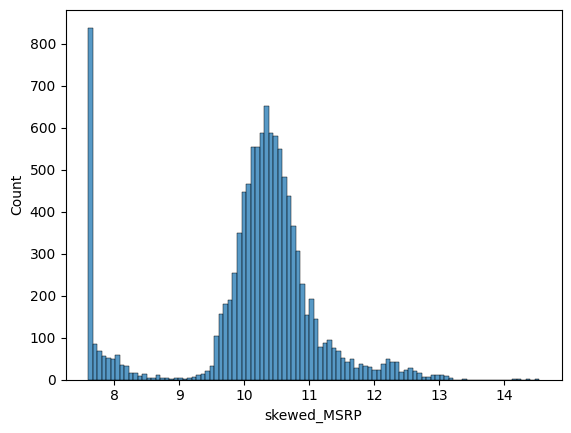

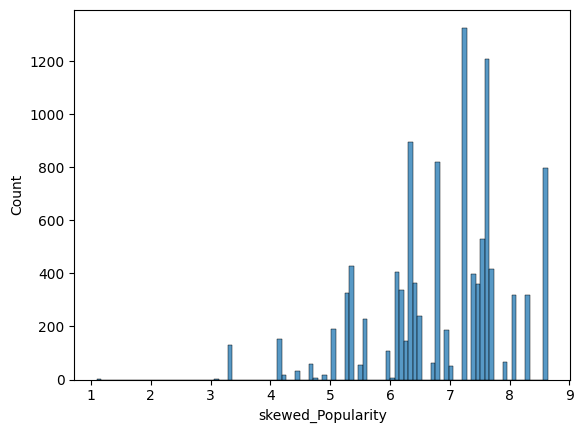

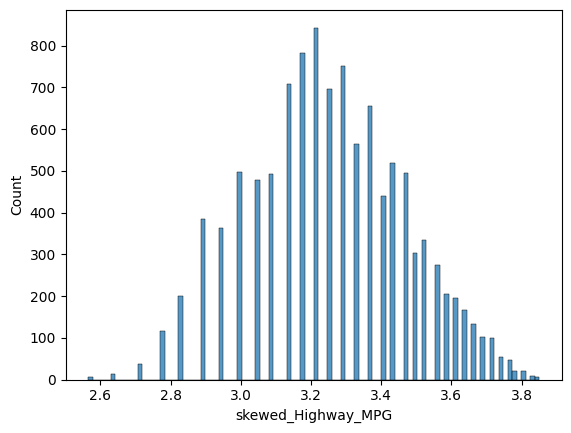

In [35]:
from seaborn import histplot
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# log skewness of MSRP
skewed_df = pd.DataFrame()
skewed_df['skewed_MSRP'] = np.log1p(df['MSRP'])

histplot(skewed_df, x = 'skewed_MSRP', bins = 100)
plt.show()

# log skewness of Popularity
skewed_df = pd.DataFrame()
skewed_df['skewed_Popularity'] = np.log1p(df['Popularity'])

histplot(skewed_df, x = 'skewed_Popularity', bins = 100)
plt.show()

# log skewness of City MPG
skewed_df = pd.DataFrame()
skewed_df['skewed_Highway_MPG'] = np.log1p(df['highway MPG'])

histplot(skewed_df, x = 'skewed_Highway_MPG', bins = 100)
plt.show()

## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()
mn = MinMaxScaler()

print(sc.fit_transform(pd.DataFrame(df['MSRP'])))
print(mn.fit_transform(pd.DataFrame(df['MSRP'])))

[[ 0.06668932]
 [-0.02183251]
 [-0.09122975]
 ...
 [ 0.13907225]
 [ 0.14391392]
 [-0.20993132]]
[[0.02138425]
 [0.01872666]
 [0.01664323]
 ...
 [0.02355732]
 [0.02370268]
 [0.01307959]]


## Feature Engineering

In [41]:
def make_columns_from_column(column: pd.Series, categories: list[str]):
    import pandas as pd

    for category in categories:
        temp = []

        for entry in column:
            for input in entry.lower().split():
                if input == category:
                    temp.append(True)
                else:
                    temp.append(False)
        df[category] = pd.Series(temp)

make_columns_from_column(df['Market Category'], ['High-Performance', 'Luxury', 'performance'])

In [85]:
def make_columns_from_column(column: pd.Series, categories: list[str]):
    import pandas as pd

    rows = column.shape[0]
    res = {}

    for category in categories:
        res.setdefault(category, [])

    for i in range(rows):
        for category in categories:
            res[category].append(False)

        for tag in column[i].lower().split(','):
            for category in categories:
                if tag == category:
                    res[category][i] = True
    
    # assigning columns to df.
    for series in res:
        df[series] = pd.Series(res[series])
                

In [ ]:
make_columns_from_column(df['Market Category'], ['high-performance', 'luxury', 'performance'])

In [71]:
df['Market Category'].head()

0    Factory Tuner,Luxury,High-Performance
1                       Luxury,Performance
2                  Luxury,High-Performance
3                       Luxury,Performance
4                                   Luxury
Name: Market Category, dtype: object

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11009 entries, 0 to 11008
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11009 non-null  object 
 1   Model              11009 non-null  object 
 2   Year               11009 non-null  int64  
 3   Engine Fuel Type   11009 non-null  object 
 4   Engine HP          11009 non-null  float64
 5   Engine Cylinders   11009 non-null  float64
 6   Transmission Type  11009 non-null  object 
 7   Driven_Wheels      11009 non-null  object 
 8   Number of Doors    11009 non-null  float64
 9   Market Category    11009 non-null  object 
 10  Vehicle Size       11009 non-null  object 
 11  Vehicle Style      11009 non-null  object 
 12  highway MPG        11009 non-null  int64  
 13  city mpg           11009 non-null  int64  
 14  Popularity         11009 non-null  int64  
 15  MSRP               11009 non-null  int64  
 16  High-Performance   110